# LINCS FAIR Assessment Summary
We investigate the assessment results using the [C2M2 assessment](https://github.com/nih-cfde/FAIR/tree/master/Demos/FAIRAssessment/c2m2)
on the LINCS metadata C2M2 serializations and a custom [FAIR Assessment](https://github.com/nih-cfde/LINCS-metadata/tree/main/FAIRAssessment/assessment) directly on the LINCS LDP3 metadata.

## Step 1. Perform FAIR Assessement on LINCS C2M2 Datapackage using [C2M2 assessment](https://github.com/nih-cfde/FAIR/tree/master/Demos/FAIRAssessment/c2m2).
```bash
# Get LINCS-metadata
git clone https://github.com/nih-cfde/LINCS-metadata.git
# Get C2M2 Assessment
git clone https://github.com/nih-cfde/FAIR.git
# Perform C2M2 assessment on LINCS-metadata
python3.8 ./FAIR/Demos/FAIRAssessment/c2m2/assess.py -i ./LINCS-metadata/c2m2_level1/datapackage.json -o c2m2.jsonl
```

In [1]:
import json
from pydoc import describe
import requests
import pandas as pd
import seaborn as sns

def get_first(obj, *K):
  for k in K:
    if obj.get(k):
      return obj[k]
  return None


In [2]:
metric_id_to_name = {
  27: 'PI Contact (Reusable)',
  104: 'Persistent identifier (Findable)',
  106: 'Metadata conformance (Findable)',
  108: 'Resource identifier (Findable)',
  110: 'Access protocol (Accessible)',
  116: 'Data Usage License (Reusable)',
  136: 'Program name (Findable)',
  137: 'Project name (Findable)',
  138: 'Responsible institution (Findable)',
  139: 'Assay (Interoperable)',
  140: 'Anatomical Part (Interoperable)',
  141: 'Disease (Interoperable)',
  142: 'File type (Interoperable)',
  143: 'Taxonomy (Interoperable)',
  144: 'Cell Line (Interoperable)',
  145: 'Landing Page (Findable)',
  310: 'PubChem Drug (Interoperable)',
  311: 'Entrez Gene (Interoperable)',
}


In [3]:
def preprocess_c2m2(assessment, answer):
  ''' Flatten assessment/answer into something introspectable with a pandas dataframe
  '''
  import re
  if type(answer['metric']['@id']) == list:
    principle = re.match(r'^.+\((.+)\)$', metric_id_to_name[answer['metric']['@id']][0]).group(1)
  else:
    principle = re.match(r'^.+\((.+)\)$', metric_id_to_name[answer['metric']['@id']]).group(1)
  #
  return {
    'id': assessment['id'],
    'target': assessment['id'],
    'title': (assessment['target']['filename'] + ' (' + assessment['id'] + ')') if assessment['target'].get('filename') else assessment['id'],
    'metric_id': answer['metric']['@id'],
    'metric': metric_id_to_name[answer['metric']['@id']],
    'principle': principle,
    'value': answer['answer'].get('value', 0),
    'comment': answer['answer'].get('comment', ''),
    'url_comment': answer['answer'].get('url_comment', ''),
  }

with open('c2m2.jsonl', 'r') as fr:
  c2m2 = pd.DataFrame([
      preprocess_c2m2(assessment, answer)
      for assessment in map(json.loads, fr)
      if assessment and assessment.get('answers')
      for answer in assessment['answers']
  ])

c2m2


id  \
0                      http://www.lincsproject.org/LDS-1176   
1                      http://www.lincsproject.org/LDS-1176   
2                      http://www.lincsproject.org/LDS-1176   
3                      http://www.lincsproject.org/LDS-1176   
4                      http://www.lincsproject.org/LDS-1176   
...                                                     ...   
24509791  http://www.lincsproject.org/L1000_LINCS_DCIC_2...   
24509792  http://www.lincsproject.org/L1000_LINCS_DCIC_2...   
24509793  http://www.lincsproject.org/L1000_LINCS_DCIC_2...   
24509794  http://www.lincsproject.org/L1000_LINCS_DCIC_2...   
24509795  http://www.lincsproject.org/L1000_LINCS_DCIC_2...   

                                                     target  \
0                      http://www.lincsproject.org/LDS-1176   
1                      http://www.lincsproject.org/LDS-1176   
2                      http://www.lincsproject.org/LDS-1176   
3                      http://www.lincsproject.org/LDS-1176   
4                      http://www.lincsproject.org/LDS-1176   
...                                                     ...   
24509791  http://www.lincsproject.org/L1000_LINCS_DCIC_2...   
24509792  http://www.lincsproject.org/L1000_LINCS_DCIC_2...   
24509793  http://www.lincsproject.org/L1000_LINCS_DCIC_2...   
24509794  http://www.lincsproject.org/L1000_LINCS_DCIC_2...   
24509795  http://www.lincsproject.org/L1000_LINCS_DCIC_2...   

                                                      title  metric_id  \
0         LDS-1176_1.1.tar.gz (http://www.lincsproject.o...        106   
1         LDS-1176_1.1.tar.gz (http://www.lincsproject.o...        136   
2         LDS-1176_1.1.tar.gz (http://www.lincsproject.o...        137   
3         LDS-1176_1.1.tar.gz (http://www.lincsproject.o...         27   
4         LDS-1176_1.1.tar.gz (http://www.lincsproject.o...        138   
...                                                     ...        ...   
24509791  L1000_LINCS_DCIC_ZTO.XPR001_U937_408H_N13_NIPB...        144   
24509792  L1000_LINCS_DCIC_ZTO.XPR001_U937_408H_N13_NIPB...        116   
24509793  L1000_LINCS_DCIC_ZTO.XPR001_U937_408H_N13_NIPB...        104   
24509794  L1000_LINCS_DCIC_ZTO.XPR001_U937_408H_N13_NIPB...        108   
24509795  L1000_LINCS_DCIC_ZTO.XPR001_U937_408H_N13_NIPB...        145   

                                      metric      principle     value  \
0            Metadata conformance (Findable)       Findable  0.807143   
1                    Program name (Findable)       Findable  1.000000   
2                    Project name (Findable)       Findable  0.000000   
3                      PI Contact (Reusable)       Reusable  0.750000   
4         Responsible institution (Findable)       Findable  0.000000   
...                                      ...            ...       ...   
24509791           Cell Line (Interoperable)  Interoperable  0.000000   
24509792       Data Usage License (Reusable)       Reusable  0.000000   
24509793    Persistent identifier (Findable)       Findable  0.500000   
24509794      Resource identifier (Findable)       Findable  1.000000   
24509795             Landing Page (Findable)       Findable  1.000000   

                                                    comment  \
0         Computed based on completeness of file (0.80) ...   
1                            Identified known program LINCS   
2                                          No project found   
3                          Contact email found, possibly PI   
4         No information about the contributing institut...   
...                                                     ...   
24509791        Cell line found but missing any information   
24509792  No information about data usage licenses are d...   
24509793  A persistent_id was identified but it is not a...   
24509794  An id and namespace were provided for the reso...   
24509795                         valid and HEAD reports 200   

                    

In [4]:
current = c2m2.groupby(['metric'])['value'].mean()
current


metric
Access protocol (Accessible)          0.000000
Anatomical Part (Interoperable)       0.863031
Assay (Interoperable)                 0.500007
Cell Line (Interoperable)             0.000000
Data Usage License (Reusable)         0.000000
Disease (Interoperable)               0.000000
File type (Interoperable)             0.750000
Landing Page (Findable)               0.983531
Metadata conformance (Findable)       0.856166
PI Contact (Reusable)                 0.750000
Persistent identifier (Findable)      0.500000
Program name (Findable)               1.000000
Project name (Findable)               0.000000
Resource identifier (Findable)        1.000000
Responsible institution (Findable)    0.000000
Taxonomy (Interoperable)              1.000000
Name: value, dtype: float64

In [5]:
# Our persistent_ids are not DOIs, but this metric is likely to become less specific in the future
c2m2[c2m2['metric'] == 'Persistent identifier (Findable)']['comment'].value_counts()


A persistent_id was identified but it is not a doi    1455069
Name: comment, dtype: int64

In [6]:
# seems to be an issue with file formats
c2m2[c2m2['metric'] == 'File type (Interoperable)']['comment'].value_counts()


Ontological IRI for data type found in EDAM.    1455069
File format found but not verified in EDAM.     1455069
Name: comment, dtype: int64

In [7]:
c2m2[c2m2['metric'] == 'File type (Interoperable)']['url_comment'].value_counts()


format:3475    1454799
data:0928      1454587
data:1566          306
format:3751        243
data:2968           94
data:2603           56
data:2536           19
format:3752          9
format:3612          7
data:3002            7
format:3709          6
format:3620          5
Name: url_comment, dtype: int64

In [8]:
# The types of errors causing these values to not be 1
c2m2[c2m2['metric'] == 'Landing Page (Findable)']['comment'].value_counts()


valid and HEAD reports 200         1423118
valid url but HEAD reported 404      31939
valid url but HEAD reported 500         12
Name: comment, dtype: int64

In [9]:
# 404s seem problematic, we need to investigate why these files are missing
c2m2[((c2m2['metric'] == 'Landing Page (Findable)') & (c2m2['comment'] == 'valid url but HEAD reported 404'))]['url_comment'].value_counts()


https://lincs-dcic.s3.amazonaws.com/LINCS-data-phase-2/L1000/L1000_LINCS_DCIC_REP.A022_HELA_24H_J11_acexamic-acid_0.12um.tsv.gz    1
https://lincs-dcic.s3.amazonaws.com/LINCS-data-phase-2/L1000/L1000_LINCS_DCIC_LJP005_MDAMB231_3H_I20_torin-2_3.33um.tsv.gz         1
https://lincs-dcic.s3.amazonaws.com/LINCS-data-phase-2/L1000/L1000_LINCS_DCIC_REP.A011_HT29_24H_B23_favipiravir_0.12um.tsv.gz      1
https://lincs-dcic.s3.amazonaws.com/LINCS-data-phase-2/L1000/L1000_LINCS_DCIC_XPR002_HA1E.311_96H_G02_PFDN2_2.00uL.tsv.gz          1
https://lincs-dcic.s3.amazonaws.com/LINCS-data-phase-2/L1000/L1000_LINCS_DCIC_XPR002_PC3.101_96H_F09_HDAC3_2.00uL.tsv.gz           1
                                                                                                                                  ..
https://lincs-dcic.s3.amazonaws.com/LINCS-data-phase-2/L1000/L1000_LINCS_DCIC_LJP007_JURKAT_24H_J23_doramapimod_0.12um.tsv.gz      1
https://lincs-dcic.s3.amazonaws.com/LINCS-data-phase-2/L1000/L1000_LI

In [10]:
# when checked manually, the 500s seem to work -- perhaps there was momentary interruption during the assessment.
c2m2[((c2m2['metric'] == 'Landing Page (Findable)') & (c2m2['comment'] == 'valid url but HEAD reported 500'))]['url_comment'].value_counts()


https://lincs-dcic.s3.amazonaws.com/LINCS-data-phase-1/L1000/L1000_LINCS_DCIC_CPC007_HA1E_6H_C05_BRD-K27074404_10.00um.tsv.gz              1
https://lincs-dcic.s3.amazonaws.com/LINCS-data-2020/L1000/ctl/L1000_LINCS_DCIC_DOS017_VCAP_6H_H03_DMSO.tsv.gz                              1
https://lincs-dcic.s3.amazonaws.com/LINCS-data-2020/L1000/compound/L1000_LINCS_DCIC_DOS054_MCF7_24H_L22_BRD-K69306987_4uM.tsv.gz           1
https://lincs-dcic.s3.amazonaws.com/LINCS-data-2020/L1000/shRNA/L1000_LINCS_DCIC_ERGK003_VCAP_120H_G12_PIP4K2C.tsv.gz                      1
https://lincs-dcic.s3.amazonaws.com/LINCS-data-2020/L1000/compound/L1000_LINCS_DCIC_PAC044_U2OS_6H_E04_BRD-K42679345_10uM.tsv.gz           1
https://lincs-dcic.s3.amazonaws.com/LINCS-data-phase-2/L1000/L1000_LINCS_DCIC_LJP009_HT29_24H_M23_MGCD-265_0.12um.tsv.gz                   1
https://lincs-dcic.s3.amazonaws.com/LINCS-data-phase-1/L1000/L1000_LINCS_DCIC_KDA008_PC3_144H_E03_MYCL1.tsv.gz                             1
https://lincs

## Step 2. Compare C2M2 Assessment summary with historic assessments using this rubric

In [11]:
# Load historic assessment summaries
df = pd.read_csv('../../FAIR/Demos/FAIRAssessment/report/2020_12_15_output_summary.tsv', sep='\t')
past = df[df['project']=='LINCS'].groupby(['label', 'metric'])['value'].first().unstack('label')
pd.concat([
    past,
    current.to_frame('June 2021'),
], axis=1)[[
    'October 2019',
    'September 2020',
    'March 2020',
    'June 2020',
    'December 2020',
    'June 2021',
]]


October 2019  September 2020  March 2020  \
metric                                                                         
Access protocol (Accessible)            0.985528        0.000000    0.990099   
Anatomical Part (Interoperable)         0.000000        0.950332    0.000000   
Assay (Interoperable)                   0.242826        0.971373    0.241667   
Cell Line (Interoperable)               0.000000        0.000000    0.000000   
Data Usage License (Reusable)           0.000000        0.000000    0.000000   
Disease (Interoperable)                 0.000000        0.000000    0.000000   
File type (Interoperable)               0.086831        0.000000    0.059406   
Landing Page (Findable)                 1.000000        1.000000    1.000000   
Metadata conformance (Findable)         0.415861        0.784484    0.225267   
PI Contact (Reusable)                   0.856729        0.000000    0.901980   
Persistent identifier (Findable)        0.000000        0.500000    0.000000   
Program name (Findable)                 0.000000        1.000000    0.000000   
Project name (Findable)                 1.000000        1.000000    1.000000   
Resource identifier (Findable)          0.750000        1.000000    0.750000   
Responsible institution (Findable)      0.928365        0.000000    0.950990   
Taxonomy (Interoperable)                0.000000             NaN    0.000000   

                                    June 2020  December 2020  June 2021  
metric                                                                   
Access protocol (Accessible)         1.000000       0.000000   0.000000  
Anatomical Part (Interoperable)      0.536398       0.983974   0.863031  
Assay (Interoperable)                0.984674       0.500055   0.500007  
Cell Line (Interoperable)            0.000000       0.000000   0.000000  
Data Usage License (Reusable)        0.000000       0.000000   0.000000  
Disease (Interoperable)              0.000000       0.000000   0.000000  
File type (Interoperable)            0.000000       0.999907   0.750000  
Landing Page (Findable)              0.625000       0.004293   0.983531  
Metadata conformance (Findable)      0.781232       0.999089   0.856166  
PI Contact (Reusable)                0.000000       0.750000   0.750000  
Persistent identifier (Findable)     0.500000       0.002147   0.500000  
Program name (Findable)              1.000000       1.000000   1.000000  
Project name (Findable)              1.000000       0.000000   0.000000  
Resource identifier (Findable)       1.000000       1.000000   1.000000  
Responsible institution (Findable)   0.000000       0.000000   0.000000  
Taxonomy (Interoperable)                  NaN       1.000000   1.000000

## Step 2. Perform FAIR Assessement on LINCS LDP3 Data using [LINCS assessment](https://github.com/nih-cfde/LINCS-metadata/tree/main/FAIRAssessment/assessment).
```bash
# Get LINCS-metadata
git clone https://github.com/nih-cfde/LINCS-metadata.git
# Grab LDP3 Data
curl https://ldp3.cloud/metadata-api/libraries | jq -rc '.[]' > libraries.jsonl
curl https://ldp3.cloud/metadata-api/signatures | jq -rc '.[]' > signatures.jsonl
# Perform assessment on LINCS-metadata
python3.8 ./LINCS-metadata/FAIRAssessment/assessment/assess.py \
  -s signatures.jsonl \
  -l libraries.jsonl \
  -o ldp3.jsonl
```

In [12]:
# get ldp3 library metadata from ldp3
ldp3_libraries = {
    library['id']: library
    for library in requests.get('https://ldp3.cloud/metadata-api/libraries').json()
}


In [13]:
# Load ldp3 assessment results
with open('ldp3.jsonl', 'r') as fr:
    ldp3 = pd.DataFrame([
    {
        'metric_id': answer['metric']['@id'],
        'metric': metric_id_to_name[answer['metric']['@id']],
        'answer_value': answer['answer'].get('value'),
        'answer_comment': answer['answer'].get('comment'),
        'answer_url_comment': answer['answer'].get('url_comment'),
        'target_id': datum['target']['id'],
        'target_library_id': datum['target']['library']['id'],
        'target_library': ldp3_libraries[datum['target']['library']['id']]['dataset'],
    }
    for datum in map(json.loads, fr)
    for answer in datum['answers']
    ])

ldp3


metric_id                              metric  answer_value  \
0               106     Metadata conformance (Findable)          1.00   
1               138  Responsible institution (Findable)          0.00   
2               110        Access protocol (Accessible)          0.75   
3               139               Assay (Interoperable)          0.25   
4               140     Anatomical Part (Interoperable)          1.00   
...             ...                                 ...           ...   
20439797        116       Data Usage License (Reusable)          0.00   
20439798        104    Persistent identifier (Findable)          0.00   
20439799        108      Resource identifier (Findable)          1.00   
20439800        145             Landing Page (Findable)          1.00   
20439801        310        PubChem Drug (Interoperable)          1.00   

                                             answer_comment  \
0              Instance validates against its own validator   
1                    Center name is not present in metadata   
2                 Access protocol (https) is encoded in uri   
3                      Assay found but not verified in OBI.   
4              Ontological IRI for anatomy found in UBERON.   
...                                                     ...   
20439797  No information about data usage licenses are d...   
20439798                           No persistent_id defined   
20439799                           A resource id is present   
20439800                          valid and GET reports 200   
20439801      Drug term is present and validated in pubchem   

                                         answer_url_comment  \
0                                                      None   
1                                                      None   
2                                      #/meta/persistent_id   
3                                               OBI:0002965   
4                                            UBERON:0002367   
...                                                     ...   
20439797                                               None   
20439798                                               None   
20439799               6304631a-b343-4f2f-b5a0-2387001e8ba2   
20439800  https://ldp3.cloud/#/Signatures/6304631a-b343-...   
20439801  {'pubchemid': 842059, 'name': 'N-(2-Hydroxyphe...   

                                     target_id  \
0         beae56c1-ccb7-5420-b019-2264722c61a6   
1         beae56c1-ccb7-5420-b019-2264722c61a6   
2         beae56c1-ccb7-5420-b019-2264722c61a6   
3         beae56c1-ccb7-5420-b019-2264722c61a6   
4         beae56c1-ccb7-5420-b019-2264722c61a6   
...                                        ...   
20439797  6304631a-b343-4f2f-b5a0-2387001e8ba2   
20439798  6304631a-b343-4f2f-b5a0-2387001e8ba2   
20439799  6304631a-b343-4f2f-b5a0-2387001e8ba2   
20439800  6304631a-b343-4f2f-b5a0-2387001e8ba2   
20439801  6304631a-b343-4f2f-b5a0-2387001e8ba2   

                             target_library_id  \
0         54198d6e-fe17-5ef8-91ac-02b425761653   
1         54198d6e-fe17-5ef8-91ac-02b425761653   
2         54198d6e-fe17-5ef8-91ac-02b425761653   
3         54198d6e-fe17-5ef8-91ac-02b425761653   
4         54198d6e-fe17-5ef8-91ac-02b425761653   
...                                        ...   
20439797  0f7cb811-7599-46de-b891-b396081a73cd   
20439798  0f7cb811-7599-46de-b891-b396081a73cd   
20439799  0f7cb811-7599-46de-b891-b396081a73cd   
20439800  0f7cb811-7599-46de-b891-b396081a73cd   
20439801  0f7cb811-7599-46de-b891-b396081a73cd   

                                 target_library  
0                                      l1000_cp  
1                                      l1000_cp  
2                                      l1000_cp  
3                                      l1000_cp  
4                                      l1000_cp  
...                                         ...  
20439797  LINCS chemical perturbagen signatures  
20439798  LINCS c

/home/daniel/.local/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


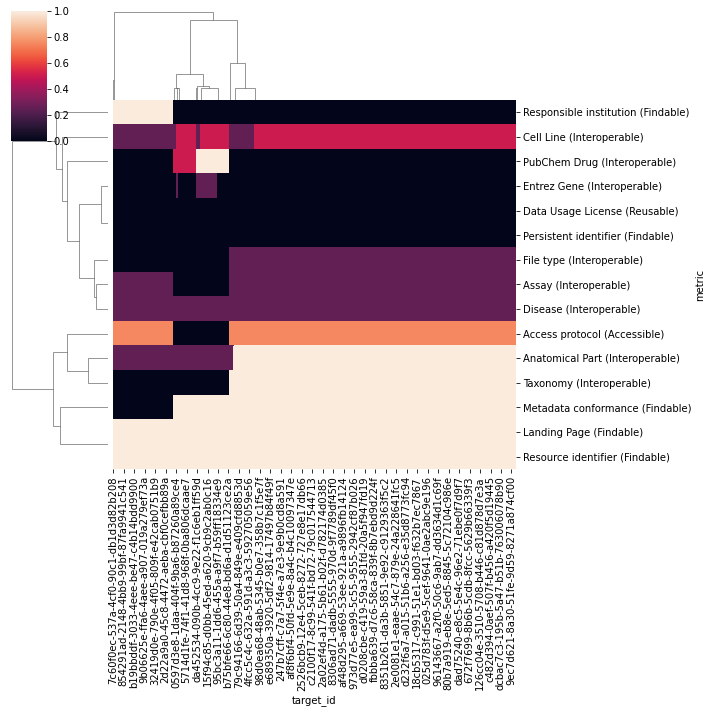

In [14]:
# Take a sample of the individual item answers
answer_matrix = ldp3.groupby(['target_id', 'metric'])['answer_value'].mean().unstack()
sns.clustermap(answer_matrix.sample(1000).fillna(0).T)


<AxesSubplot:xlabel='metric', ylabel='target_library'>

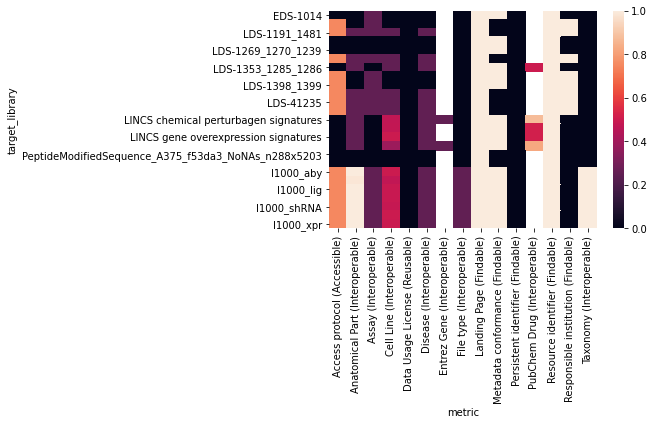

In [15]:
# See average answer per library
answer_matrix = ldp3.groupby(['target_library', 'metric'])['answer_value'].mean().unstack()
sns.heatmap(answer_matrix)


## Step 3. Compare assessment on C2M2 with LDP3 Assessment

<AxesSubplot:>

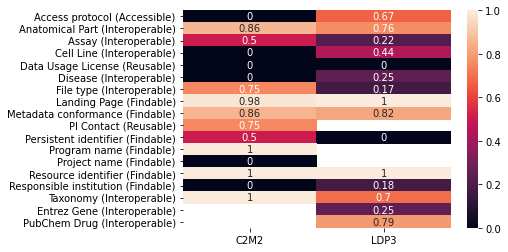

In [16]:
cmp = pd.concat([
    c2m2.groupby('metric')['value'].mean().to_frame('C2M2'),
    ldp3.groupby('metric')['answer_value'].mean().to_frame('LDP3'),
], axis=1)

sns.heatmap(
    cmp,
    annot=True,
)


## Step 4. Prepare Assessment Summaries for FAIRshake
These computational assessments are extremely granular and useful for
in-depth per-file/signature review. However, our data is highly uniform
within each library, and as such, it makes sense to generate per-library
summary assessments and submitting these to FAIRshake.

Effectively, the heatmaps we looked at above will be registered with FAIRshake
for external review and historical archiving. These per-library results
will also be available as FAIR Insignias on LDP3 with the help of FAIRshake.

In [17]:
from collections import OrderedDict
fairshake = OrderedDict()


### LDP3 Assessments

In [18]:
# register digital objects
for library in ldp3['target_library_id'].unique():
  title = get_first(
    ldp3_libraries[library]['meta'],
    'title', 'libraryName', 'SourceID', 'description'
  )
  assert title is not None
  description = get_first(
      ldp3_libraries[library]['meta'],
      'libraryInfo', 'description',
  )
  obj = {
    '@type': 'DigitalObject',
    'title': title,
    'url': '\n'.join(filter(None, [
        f"https://ldp3.cloud/#/Datasets/{library}",
        ldp3_libraries[library]['meta'].get('url_prefix'),
    ] + [
        v['link']
        for k, v in ldp3_libraries[library]['meta'].items()
        if type(v) == dict and 'link' in v
    ])),
    'rubrics': [107], # LINCS Rubric
    'projects': [92], # LINCS CFDE Assessments
  }
  if description != title and description:
    obj['description'] = description
  fairshake[(library, 'DigitalObject')] = obj


In [19]:
answer_matrix = ldp3.groupby(['target_library_id', 'metric_id'])['answer_value'].mean().unstack()
for library, assessment in answer_matrix.iterrows():
  fairshake[(library, 'Assessment')] = {
    '@type': 'Assessment',
    'methodology': 'auto',
    'published': True,
    'target': { '@id': (library, 'DigitalObject') },
    'rubric': 107, # LINCS Rubric
    'project': 92, # LINCS CFDE Assessments
  }
  # fairshake[(library, 'assessment')] 
  for metric, answer in assessment.iteritems():
    fairshake[(library, metric, 'Answer')] = {
      '@type': 'Answer',
      'assessment': { '@id': (library, 'Assessment') },
      'metric': metric,
      'answer': None if pd.isna(answer) else answer,
    }  


### C2M2 Assessment

In [20]:
fairshake[('c2m2', 'Assessment')] = {
  '@type': 'Assessment',
  'target': 812123, # Digital Object of LINCS Project
  'project': 87, # C2M2 Assessment project
}
for metric, answer in c2m2.groupby('metric_id')['value'].mean().iteritems():
  fairshake[('c2m2', metric, 'Answer')] = {
    '@type': 'Answer',
    'assessment': { '@id': ('c2m2', 'Assessment') },
    'metric': metric,
    'answer': None if pd.isna(answer) else answer,
  }


## Submit to FAIRshake